[![Abrir no Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/labren/sonda-curadoria/blob/main/01_Analise_Exploratoria_Solarimetricos.ipynb)

# Análise Exploratória de Dados Solarimétricos
Este notebook realiza uma análise exploratória dos dados solarimétricos da rede SONDA.

## Importação das Bibliotecas
- **duckdb**: Banco de dados relacional que permite consultas SQL em arquivos locais
- **matplotlib.pyplot**: Biblioteca para criação de gráficos
- **seaborn**: Biblioteca para visualização de dados estatísticos

In [1]:
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

## Configuração Inicial
Definindo o caminho do arquivo parquet contendo os dados solarimétricos e o nome da tabela.

In [ ]:
# Configurações para o nome do arquivo e da tabela
ARQUIVO_SOLARIMETRO = './Solarimetrica.parquet'
NOME_DA_TABELA = 'solarimetrica'

In [16]:
# Instalar gdown para descargar el archivo de Google Drive
!python -m pip install -q -U gdown

import gdown

url = 'https://drive.google.com/uc?id=12__H_pE_JEEkehdCDdsjvNj08XdfhBiu'
gdown.download(url, ARQUIVO_SOLARIMETRO, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=12__H_pE_JEEkehdCDdsjvNj08XdfhBiu
From (redirected): https://drive.google.com/uc?id=12__H_pE_JEEkehdCDdsjvNj08XdfhBiu&confirm=t&uuid=59b9e8ae-78cc-4440-8a8f-46b78bce566d
To: /home/helvecioneto/sonda-curadoria/Solarimetrica.parquet
100%|██████████| 4.09G/4.09G [06:04<00:00, 11.2MB/s]


'Solarimetrica.parquet'

## Conexão com o Banco de Dados
Criando uma conexão em memória com o DuckDB.

In [6]:
con = duckdb.connect(database=':memory:')

Importando os dados do arquivo Parquet para uma tabela no DuckDB.

In [11]:
# Cria as tabelas no banco de dados DuckDB a partir dos arquivos Parquet
con.execute(f"""CREATE TABLE IF NOT EXISTS {NOME_DA_TABELA} AS \
            SELECT * FROM read_parquet('{ARQUIVO_SOLARIMETRO}')""")

# Visualização Inicial dos Dados
Exibindo as primeiras 5 linhas da tabela para verificar sua estrutura.

In [12]:
# Exibe as primeiras linhas da tabela
con.execute(f"SELECT * FROM {NOME_DA_TABELA} LIMIT 5").fetch_df()

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,dir_min,lw_avg,lw_std,lw_max,lw_min,temp_glo,temp_dir,temp_dif,temp_dome,temp_case
0,SLZ,2015-06-12 06:22:00,2015,163,382.0,-1.305,0.00,-1.305,-1.305,-1.292,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,SLZ,2015-06-12 11:17:00,2015,163,677.0,110.800,1.94,113.600,107.000,95.000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,SLZ,2015-06-12 14:23:00,2015,163,863.0,955.000,15.57,968.000,925.000,915.000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,SLZ,2015-06-12 21:09:00,2015,163,1269.0,-1.458,0.21,-1.305,-1.958,-2.579,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,SLZ,2015-06-12 22:33:00,2015,163,1353.0,-0.653,0.00,-0.653,-0.653,-1.292,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [10]:
# Faz uma consulta para obter dados da estação BRB para o período de 2018-12-01 a 2019-01-01
query = f"""
SELECT * FROM {NOME_DA_TABELA}
WHERE acronym = 'BRB' AND timestamp >= '2018-12-01' AND timestamp <= '2019-01-01'
"""
# Executa a consulta e armazena o resultado em um DataFrame
estacao_df = con.execute(query).fetch_df()
estacao_df

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,dir_min,lw_avg,lw_std,lw_max,lw_min,temp_glo,temp_dir,temp_dif,temp_dome,temp_case
0,BRB,2018-12-01 07:42:00,2018,335,462.0,-0.543,0.053,-0.526,-0.701,-0.431,...,0.000,393.7,1.177,395.3,392.1,19.13,18.64,18.69,19.15,19.15
1,BRB,2018-12-01 10:11:00,2018,335,611.0,94.600,1.217,96.700,92.500,90.600,...,0.225,396.6,0.200,396.9,396.0,19.63,19.26,19.14,19.77,19.77
2,BRB,2018-12-01 15:48:00,2018,335,948.0,448.600,6.200,455.300,438.700,433.700,...,2.700,393.8,0.229,394.2,393.3,21.50,21.98,21.90,21.61,21.61
3,BRB,2018-12-02 00:08:00,2018,336,8.0,-0.540,0.048,-0.526,-0.701,-0.418,...,0.000,400.3,0.159,400.6,399.8,20.83,20.27,20.58,20.77,20.77
4,BRB,2018-12-02 07:54:00,2018,336,474.0,-0.634,0.085,-0.526,-0.701,-0.313,...,0.000,408.0,0.147,408.5,407.7,19.01,18.62,18.71,19.05,19.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44635,BRB,2018-12-31 14:14:00,2018,365,854.0,723.000,22.080,760.000,674.200,553.800,...,105.700,384.1,0.349,384.7,383.3,25.35,25.70,24.80,25.42,25.42
44636,BRB,2018-12-31 14:46:00,2018,365,886.0,1077.000,4.340,1086.000,1070.000,504.900,...,543.700,383.9,0.479,385.1,383.1,27.26,27.23,27.53,26.83,26.83
44637,BRB,2018-12-31 20:52:00,2018,365,1252.0,4.065,0.146,4.205,3.855,4.196,...,0.000,401.1,0.397,401.6,400.1,19.06,18.80,18.81,19.06,19.06
44638,BRB,2018-12-31 22:18:00,2018,365,1338.0,-0.134,0.144,0.000,-0.351,-0.313,...,-0.450,399.0,0.774,400.9,398.2,18.78,18.53,18.60,18.79,18.79


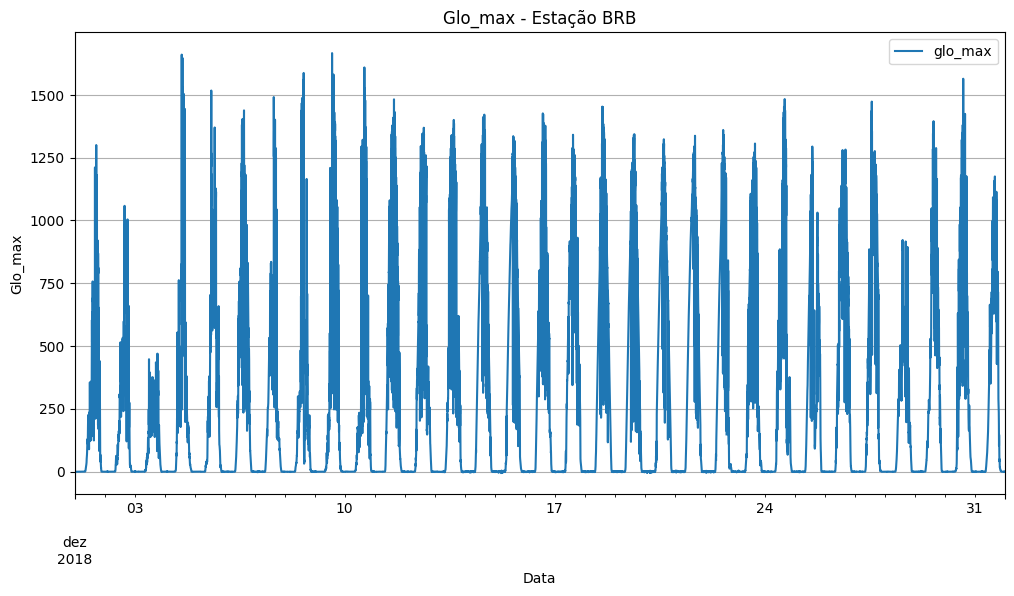

In [11]:
# Seta coluna timestamp como índice e plota variável glo_max
plot_estacao = estacao_df.set_index('timestamp').sort_index()
plot_estacao[['glo_max']].plot(title='Glo_max - Estação BRB', figsize=(12, 6))
plt.xlabel('Data')
plt.ylabel('Glo_max')
plt.grid()
plt.show()

In [13]:
import warnings
warnings.filterwarnings("ignore")

def verifica_temporal(base):
    # Faz um agrupamento por acronym e timestamp para verificar se os dados são temporais, fazendo a contagem de registros por dia
    query = f"""
    SELECT acronym, DATE_TRUNC('year', timestamp) AS data, COUNT(*) AS registros
    FROM {base}
    GROUP BY acronym, data
    ORDER BY data
    """
    return con.execute(query).fetch_df()


def plot_tempora(df, titulo):
    df["year"] = df["data"].dt.year
    df["month"] = df["data"].dt.month
    df = df.dropna(subset=["year"])
    df["year"] = df["year"].astype(int)
    # Reagrupando os dados para evitar duplicatas ao pivotar
    df_grouped = df.groupby(["acronym", "year"])["registros"].sum().reset_index()
    # Criando a matriz pivot corrigida
    heatmap_data = df_grouped.pivot(index="acronym", columns="year", values="registros")
    # Criando a figura
    plt.figure(figsize=(8, max(4, len(heatmap_data) * 0.2)))  # Ajusta dinamicamente o tamanho
    sns.heatmap(heatmap_data, cmap="coolwarm_r", linewidths=0.5, linecolor="gray", 
                cbar_kws={'label': 'Número de Registros'}, annot=False)
    # Ajustando o gráfico
    plt.title(titulo)
    plt.xlabel("Ano")
    plt.ylabel("Estação")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

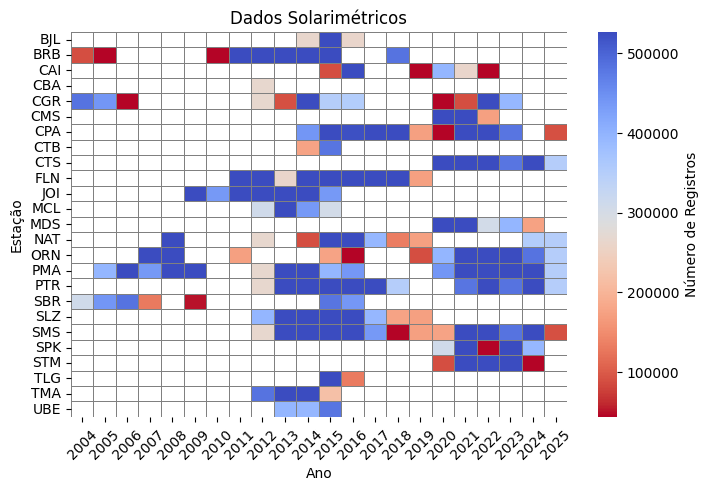

In [14]:
# Plotando os dados temporais de dados disponíveis
temporal_solar = verifica_temporal(NOME_DA_TABELA)
plot_tempora(temporal_solar, 'Dados Solarimétricos')

## Análise dos dados em quarentena

In [2]:
# Download quarentena.csv from Google Drive
url = 'https://drive.google.com/uc?id=1e6UCQ_oKKdnuDtGTFRbtNX9F1rHqi4YO'
gdown.download(url, 'quarentena.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1e6UCQ_oKKdnuDtGTFRbtNX9F1rHqi4YO
To: /home/helvecioneto/sonda-curadoria/quarentena.csv
100%|██████████| 82.1k/82.1k [00:00<00:00, 757kB/s]


'quarentena.csv'

In [3]:
import pandas as pd

# Lê o arquivo CSV quarentena.csv
quarentena_df = pd.read_csv('quarentena.csv')
quarentena_df

,qid,estacao,tipo,status,code,data_detecao,data_tratamento,problema,path
0,1,SPK,SD,Ruim,3,2025-07-28 15:17:09,NaN,"datas diferentes encontradas, esperado: 2023-1...",output/sonda-quarentena/SPK/Solarimetricos/SPK...
1,2,SPK,SD,Ruim,3,2025-07-28 15:17:09,NaN,"datas diferentes encontradas, esperado: 2023-1...",output/sonda-quarentena/SPK/Solarimetricos/SPK...
2,3,SPK,SD,Ruim,3,2025-07-28 15:17:09,NaN,"datas diferentes encontradas, esperado: 2024-0...",output/sonda-quarentena/SPK/Solarimetricos/SPK...
3,4,SPK,SD,Ruim,3,2025-07-28 15:17:09,NaN,"datas diferentes encontradas, esperado: 2024-0...",output/sonda-quarentena/SPK/Solarimetricos/SPK...
4,5,SPK,SD,Ruim,3,2025-07-28 15:17:09,NaN,"datas diferentes encontradas, esperado: 2024-0...",output/sonda-quarentena/SPK/Solarimetricos/SPK...
...,...,...,...,...,...,...,...,...,...
383,384,CAI,SD,Ruim,3,2025-07-28 15:31:04,NaN,"datas diferentes encontradas, esperado: 2020-0...",output/sonda-quarentena/CAI/Solarimetricos/CAI...
384,385,CAI,SD,Ruim,3,2025-07-28 15:31:04,NaN,"datas diferentes encontradas, esperado: 2020-0...",output/sonda-quarentena/CAI/Solarimetricos/CAI...
385,386,CAI,SD,Ruim,3,2025-07-28 15:31:04,NaN,"datas diferentes encontradas, esperado: 2020-0...",output/sonda-quarentena/CAI/Solarimetricos/CAI...
386,387,CAI,SD,Ruim,3,2025-07-28 15:31:04,NaN,"datas diferentes encontradas, esperado: 2020-0...",output/sonda-quarentena/CAI/Solarimetricos/CAI...


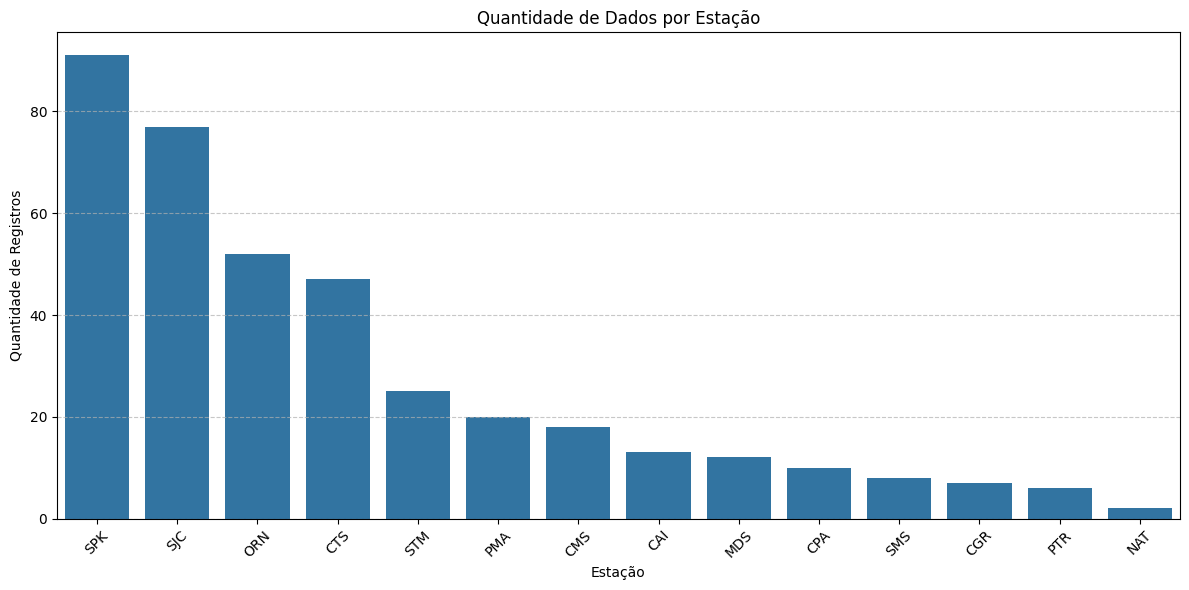

In [11]:
# Agrupando os dados por estação e contando registros
estacao_counts = quarentena_df.groupby('estacao').size().reset_index(name='contagem')

# Ordenando por contagem para melhor visualização
estacao_counts = estacao_counts.sort_values('contagem', ascending=False)

# Criando gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='estacao', y='contagem', data=estacao_counts)

# Adicionando título e rótulos
plt.title('Quantidade de Dados por Estação')
plt.xlabel('Estação')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
# Exibindo a tabela com as contagens
print("Número de registros por estação:")
print(estacao_counts)

Número de registros por estação:
   estacao  contagem
12     SPK        91
10     SJC        77
7      ORN        52
4      CTS        47
13     STM        25
8      PMA        20
2      CMS        18
0      CAI        13
5      MDS        12
3      CPA        10
11     SMS         8
1      CGR         7
9      PTR         6
6      NAT         2


In [20]:
# Faz uma contagem dos problemas encontrados usando string matching
from collections import Counter

# Definindo os tipos de problemas a serem contados
tipos = ['datas diferentes encontradas', 'não é possível realizar o teste temporal','mais de 50% dos valores de timestamp são nulos', 'progressão de timestamps não é monotônica crescente', 'intervalo total de timestamps é menor que 12 horas']

def contar_problemas(df, tipos):
    contagem = Counter()
    
    # Para cada tipo de problema, procura por strings que contenham essa substring
    for tipo in tipos:
        # Conta quantas linhas contêm este tipo de problema
        count = df['problema'].str.contains(tipo, na=False).sum()
        contagem[tipo] = count
    
    return contagem

# Contando os problemas encontrados
problemas_contados = contar_problemas(quarentena_df, tipos)

# Exibindo os resultados
print("Contagem de problemas encontrados:")
for problema, contagem in problemas_contados.items():
    print(f"{problema}: {contagem}")

Contagem de problemas encontrados:
datas diferentes encontradas: 309
não é possível realizar o teste temporal: 0
mais de 50% dos valores de timestamp são nulos: 0
progressão de timestamps não é monotônica crescente: 43
intervalo total de timestamps é menor que 12 horas: 36


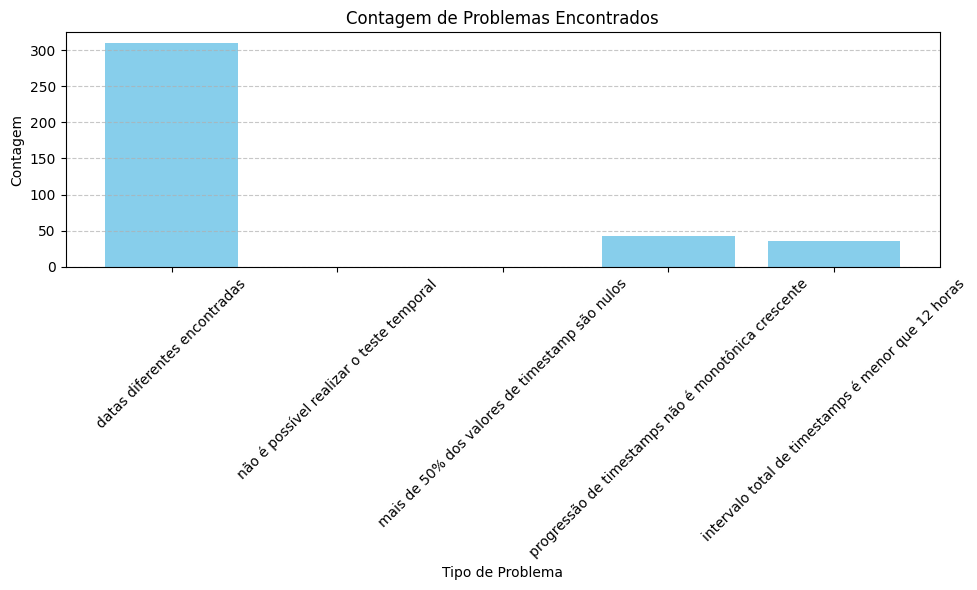

In [21]:
# Crie um plot de barras para visualizar a contagem de problemas
plt.figure(figsize=(10, 6))
plt.bar(problemas_contados.keys(), problemas_contados.values(), color='skyblue')
plt.title('Contagem de Problemas Encontrados')
plt.xlabel('Tipo de Problema')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()